<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-of-libraries" data-toc-modified-id="Import-of-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import of libraries</a></span></li><li><span><a href="#DataFrame-Import" data-toc-modified-id="DataFrame-Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataFrame Import</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Firsts-steps" data-toc-modified-id="Firsts-steps-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Firsts steps</a></span></li><li><span><a href="#Relations-with-types-and-Frauds" data-toc-modified-id="Relations-with-types-and-Frauds-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Relations with types and Frauds</a></span></li></ul></li><li><span><a href="#Fraud-and-not-Fraud-Analysis" data-toc-modified-id="Fraud-and-not-Fraud-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fraud and not Fraud Analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Ploting-and-visualisation" data-toc-modified-id="Ploting-and-visualisation-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Ploting and visualisation</a></span><ul class="toc-item"><li><span><a href="#Histplot" data-toc-modified-id="Histplot-4.0.1.1"><span class="toc-item-num">4.0.1.1&nbsp;&nbsp;</span>Histplot</a></span></li><li><span><a href="#Pie-Chart" data-toc-modified-id="Pie-Chart-4.0.1.2"><span class="toc-item-num">4.0.1.2&nbsp;&nbsp;</span>Pie Chart</a></span></li><li><span><a href="#Scatter-Plot" data-toc-modified-id="Scatter-Plot-4.0.1.3"><span class="toc-item-num">4.0.1.3&nbsp;&nbsp;</span>Scatter Plot</a></span></li><li><span><a href="#Correlation-matrix" data-toc-modified-id="Correlation-matrix-4.0.1.4"><span class="toc-item-num">4.0.1.4&nbsp;&nbsp;</span>Correlation matrix</a></span></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-4.0.1.5"><span class="toc-item-num">4.0.1.5&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="#Pairplot" data-toc-modified-id="Pairplot-4.0.1.6"><span class="toc-item-num">4.0.1.6&nbsp;&nbsp;</span>Pairplot</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Flagged-Fraud" data-toc-modified-id="Flagged-Fraud-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Flagged Fraud</a></span></li><li><span><a href="#Analisis-exclusivo-de-Transferencia-+-Cash-Out" data-toc-modified-id="Analisis-exclusivo-de-Transferencia-+-Cash-Out-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analisis exclusivo de Transferencia + Cash Out</a></span><ul class="toc-item"><li><span><a href="#Drop-columns-and-encoding-the-type-column" data-toc-modified-id="Drop-columns-and-encoding-the-type-column-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Drop columns and encoding the type column</a></span></li></ul></li></ul></div>

# Import of libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# DataFrame Import

In [3]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

# Exploratory Data Analysis

## Firsts steps

In [4]:
print(df.shape)       # Check the content of the DataFrame, 6M Rows, 11 columns
df.tail()

(6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.isna().sum()   #Check that the DF has no null data

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
len(df.drop_duplicates())==len(df) # duplicates doesnt exist

True

In [7]:
df.info() # We can see the type of data we have per column, is all correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe() # Checking DF statistics

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [11]:
df.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.99])
#What we can see here, is that there are a few transactions that have very large amounts. 
#Also, the mean of isFraud is 0.00129, meaning we there are ~1.3 frauds per 1000 transactions.


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
90%,3.990000e+02,3.654233e+05,1.822508e+06,1.970345e+06,2.914267e+06,3.194870e+06,0.000000e+00,0.000000e+00
99%,6.810000e+02,1.615979e+06,1.602726e+07,1.617616e+07,1.237182e+07,1.313787e+07,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Una vez vemos los datos y sus estadísticas, empezamos a ver el contenido de las columnas por separado

In [14]:
df.step.value_counts() # Analysing values column by column , This column is hours from 30 days

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [15]:
df.type.value_counts() #Types of mobile finance movements

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [16]:
df.amount.value_counts() 

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
91066.95          1
808.61            1
483714.88         1
775343.17         1
223098.05         1
Name: amount, Length: 5316900, dtype: int64

In [17]:
df.amount.max()

92445516.64

In [18]:
print(df.nameOrig.value_counts()) # No existe M en nameOrig

C1462946854    3
C2051359467    3
C1065307291    3
C724452879     3
C400299098     3
              ..
C1207972596    1
C194296620     1
C583125323     1
C922807146     1
C1470905626    1
Name: nameOrig, Length: 6353307, dtype: int64


In [19]:
df.nameDest.value_counts() # Existen fraudes cometidos por el mismo número de cuenta en varias ocasiones, analizar despues
# Existen 2 nomenclaturas. M, y C. C means Client

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1952995470      1
M1460670769      1
M425159188       1
M649148617       1
M2054161187      1
Name: nameDest, Length: 2722362, dtype: int64

In [30]:
df.loc[(df.nameDest.str.contains('M')) & (df.type == 'PAYMENT')]
#Haciendo un análisis, M significa Merchant, y solo tiene tipo Payment

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362312,718,PAYMENT,8178.01,C1213413071,11742.0,3563.99,M1112540487,0.0,0.0,0,0
6362314,718,PAYMENT,17841.23,C1045048098,10182.0,0.00,M1878955882,0.0,0.0,0,0
6362316,718,PAYMENT,1022.91,C1203084509,12.0,0.00,M675916850,0.0,0.0,0,0
6362318,718,PAYMENT,4109.57,C673558958,5521.0,1411.43,M1126011651,0.0,0.0,0,0


In [20]:
df.oldbalanceOrg.value_counts()

0.00          2102449
184.00            918
133.00            914
195.00            912
164.00            909
               ...   
396813.93           1
189311.00           1
3355778.65          1
236757.00           1
102899.11           1
Name: oldbalanceOrg, Length: 1845844, dtype: int64

In [21]:
df.newbalanceOrig.value_counts()

0.00          3609566
9011.73             4
7468.59             4
8927.38             4
4019.43             4
               ...   
513900.83           1
6644533.36          1
11633.34            1
1728256.15          1
102899.11           1
Name: newbalanceOrig, Length: 2682586, dtype: int64

In [22]:
df.oldbalanceDest.value_counts()

0.00           2704388
10000000.00        615
20000000.00        219
30000000.00         86
40000000.00         31
                ...   
174945.83            1
2851171.35           1
740725.47            1
76834.40             1
732602.41            1
Name: oldbalanceDest, Length: 3614697, dtype: int64

In [23]:
df.newbalanceDest.value_counts()

0.00           2439433
10000000.00         53
971418.91           32
19169204.93         29
16532032.16         25
                ...   
350033.41            1
302234.71            1
219824.01            1
808511.54            1
970408.13            1
Name: newbalanceDest, Length: 3555499, dtype: int64

In [24]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [25]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

Se observan los valores que existen dentro de cada columna, para poder determinar un análisis posterior

## Relations with types and Frauds

In [26]:
print('Los tipos de casos fraudulentos son {}'.format(
list(df.loc[df.isFraud == 1].type.drop_duplicates())))  

dfFraudTransfer = df.loc[(df.isFraud ==1) & (df.type == 'TRANSFER')]
dfFraudCashOut = df.loc[(df.isFraud ==1) & (df.type == 'CASH_OUT')]
dfFraudPayment = df.loc[(df.isFraud ==1) & (df.type == 'PAYMENT')]
dfFraudCashIn = df.loc[(df.isFraud ==1) & (df.type == 'CASH_IN')]
dfFraudDebit = df.loc[(df.isFraud ==1) & (df.type == 'DEBIT')]




print('El numero de casos fraudulentos TRANSFERS = {}'.format(len(dfFraudTransfer)))
print('El numero de casos fraudulentos CASH_OUT = {}'.format(len(dfFraudCashOut)))
print('El numero de casos fraudulentos PAYMENT = {}'.format(len(dfFraudPayment)))
print('El numero de casos fraudulentos CASH_IN = {}'.format(len(dfFraudCashIn)))
print('El numero de casos fraudulentos DEBIT = {}'.format(len(dfFraudDebit)))

Los tipos de casos fraudulentos son ['TRANSFER', 'CASH_OUT']
El numero de casos fraudulentos TRANSFERS = 4097
El numero de casos fraudulentos CASH_OUT = 4116
El numero de casos fraudulentos PAYMENT = 0
El numero de casos fraudulentos CASH_IN = 0
El numero de casos fraudulentos DEBIT = 0


In [27]:
print('Los tipos de casos FlaggedFraud son {}'.format(
list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())))




Los tipos de casos FlaggedFraud son ['TRANSFER']


In [102]:
fraud.amount.max() # los FlaggedFraud son solo de Transferencias

10000000.0

# Fraud and not Fraud Analysis
Falta analizar fraud vs normal, basicamente todo el dataframe

In [112]:
fraud = df.loc[df.isFraud == 1]  # Create a variable DF where is Fraud
dfNotFraud = df.loc[df.isFraud == 0]

In [35]:
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [138]:
df.nameDest.str.contains('M').any() #Como hemos visto, si existe en cuenta destino M

True

In [139]:
fraud.nameDest.str.contains('M').any() #Para los Merchant, no hay fraudes en destino ni en origen, ya que no estan presentes en 
#ninguno de ellos

False

### Ploting and visualisation

Quiero ver las relaciones que hay entre las cuentas con fraude, y las cantidades

In [88]:
df_g=fraud.groupby('step').sum()['amount'] 

df_g.head()

step
1     3740247.01
2     4186592.48
3       66832.74
4    26400274.90
5      381841.54
Name: amount, dtype: float64

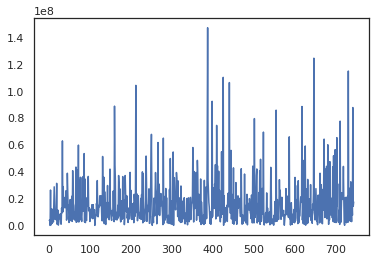

In [89]:
plt.plot(df_g);

#### Histplot

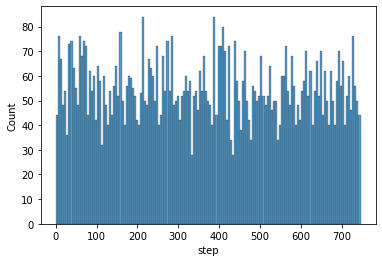

In [39]:
sns.histplot(x=fraud.step,bins=100,binwidth=5); # We observe there are frauds every hour

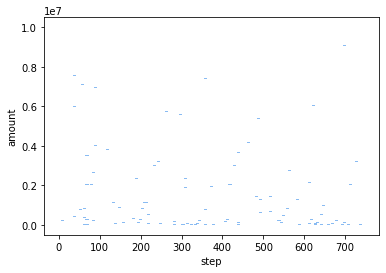

In [38]:
sns.histplot(x=fraud.step,y=fraud.amount, bins=100,binwidth=5);

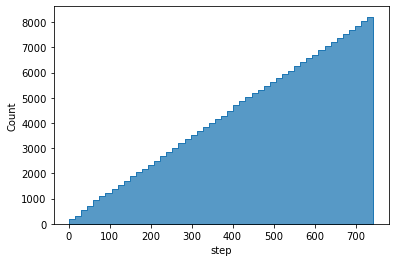

In [39]:
sns.histplot(x=fraud.step, bins=50,element='step', cumulative=True); #Los fraudes son constantes

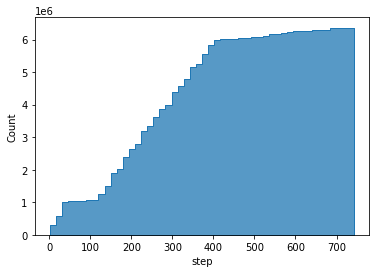

In [36]:
sns.histplot(x=df.step, bins=50,element='step', cumulative=True); 

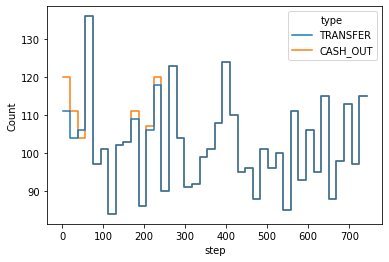

In [44]:
sns.histplot(x=fraud.step, 
             hue=fraud[(fraud.type=='CASH_OUT') | (fraud.type=='TRANSFER')].type,
             bins=40,
            element='step',
            fill=False);

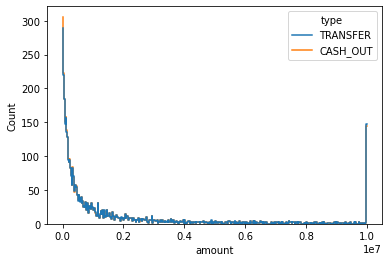

In [51]:
sns.histplot(x=fraud.amount,             # It looks like there are a lot of small amount frauds, and there are also frauds of more than 1M
             hue=fraud[(fraud.type=='CASH_OUT') | (fraud.type=='TRANSFER')].type,
             bins=400,
            element='step',
            fill=False);

It looks like there are a lot of small amount frauds, and there are also frauds of more than 1M

In [115]:
def myhistplot(fraud_type):                        # METER EN ARCHIVO.py
    
    '''Esta funcion es para hacer histogramas introduciendo un valor de una columna'''
    return sns.histplot(x=fraud.step, 
             hue=fraud[(fraud.type== fraud_type)].type,
             bins=40,
            element='step')
    

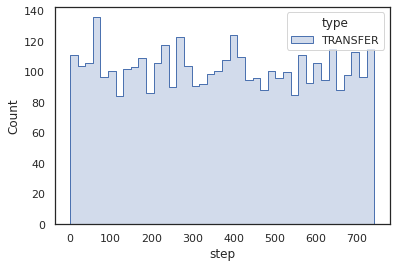

In [117]:
myhistplot('TRANSFER');

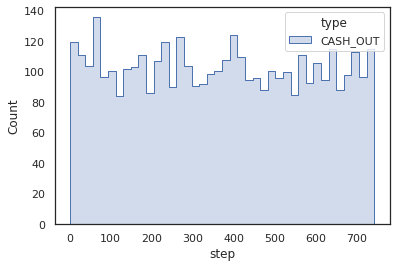

In [146]:
myhistplot('CASH_OUT');

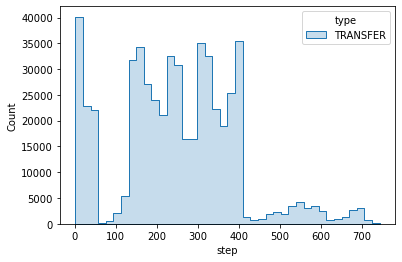

In [49]:
sns.histplot(x=df.step,                          #histplot with original DF, transactions per hour
             hue=df[(df.type=='TRANSFER') ].type,
             bins=40,
            element='step');

#### Pie Chart

In [72]:
tab_type=pd.crosstab(fraud.type, fraud.isFraud)  #necesito trabajar en esto
tab_amount=pd.crosstab(fraud.amount, fraud.isFraud)

In [13]:
tab_amount

NameError: name 'tab_amount' is not defined

In [12]:
fig, ax = plt   # he definido 2 variables, 1 fila 3 columnas de plots

for i, cate in enumerate(tab.index[:3]):
    
    tab.loc[cate].plot.pie(ax=ax[i],         # ejes
                          autopct='%1.f%%',  # los titulos
                          startangle=90)     # angulo inicial
    ax[i].set_ylabel('')
    ax[i].set_title(cate, fontweight='bold')

TypeError: cannot unpack non-iterable module object

#### Scatter Plot

<AxesSubplot:xlabel='type', ylabel='amount'>

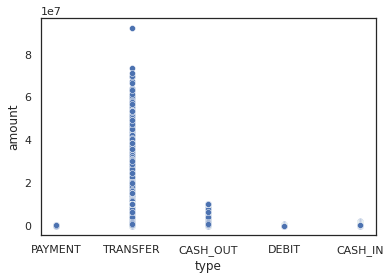

In [81]:
sns.scatterplot(x='type',y='amount',data=df)

<AxesSubplot:xlabel='type', ylabel='amount'>

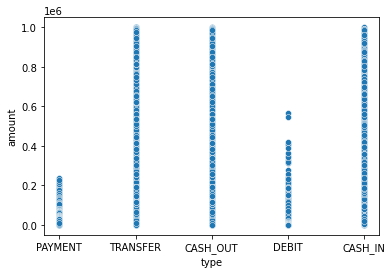

In [55]:
sns.scatterplot(x='type',y='amount',data=df[df.amount<1e6])# Así podemos comparar un poco mejor las cantidades por typo

<AxesSubplot:xlabel='type', ylabel='amount'>

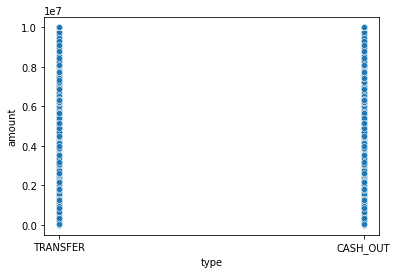

In [59]:
sns.scatterplot(x='type',y='amount',data=fraud) # parece que se comportan igual ambos tipos de fraude en cuanto a cantidades

#### Correlation matrix

In [61]:
corr=df.corr()   
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


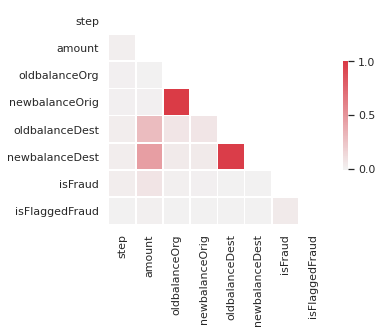

In [79]:
sns.set(style='white')   # estilo blanco


mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior

color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores


sns.heatmap(corr,  # mapa de calor
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': .5}  # barra lateral
           );

Existe una correlación altísima en las columnas Newbalance orig y oldbalance orig, tambien en oldbalanceDest y newbalanceDest, tiene sentido en transacciones, de cuenta A a cuenta A/B, tambien existe correlacion de la cantidad con los balances de destino

#### Boxplots

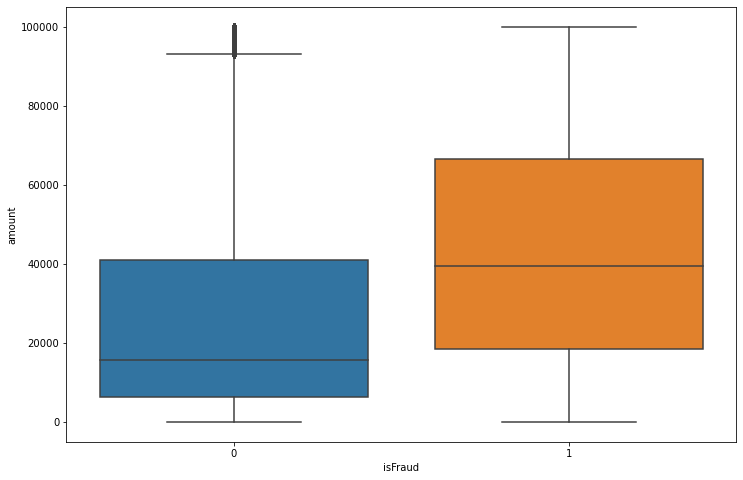

In [41]:
df_sample = df.sample(int(5e5)) #Para que el kernel vaya más rapido
plt.figure(figsize=(12,8))
sns.boxplot(x = 'isFraud', y = 'amount', data = df[df.amount < 1e5]);

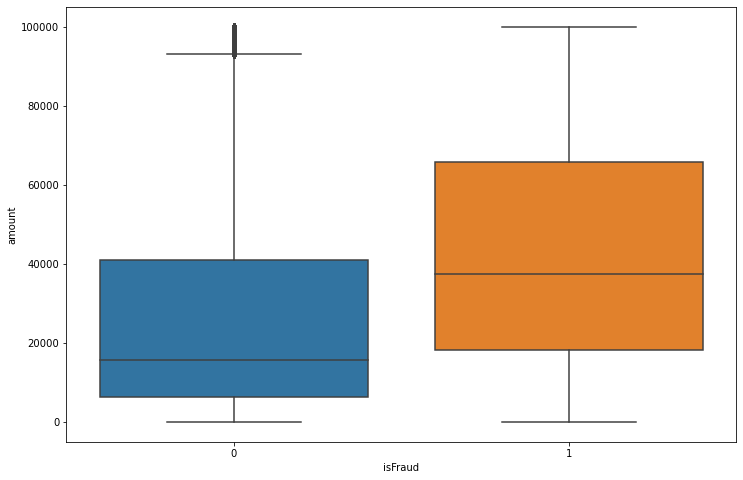

In [51]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'isFraud', y = 'amount', data = df_sample[df_sample.amount < 1e5]);

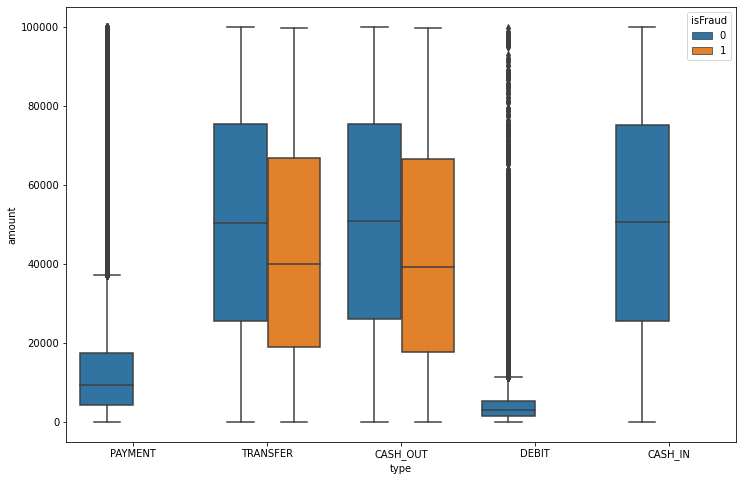

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(hue = 'isFraud', x = 'type', y = 'amount', data = df[df.amount < 1e5]);

Podemos observar, que las transacciones fraudulentas suelen ser de cantidades mas grandes.
Por otro lado, confirmamos que los fraudes se comportan de la misma forma tanto en transfererncia como en cash out.
No solo en los fraudes, también en las no fraudulentas

#### Pairplot

<Figure size 864x576 with 0 Axes>

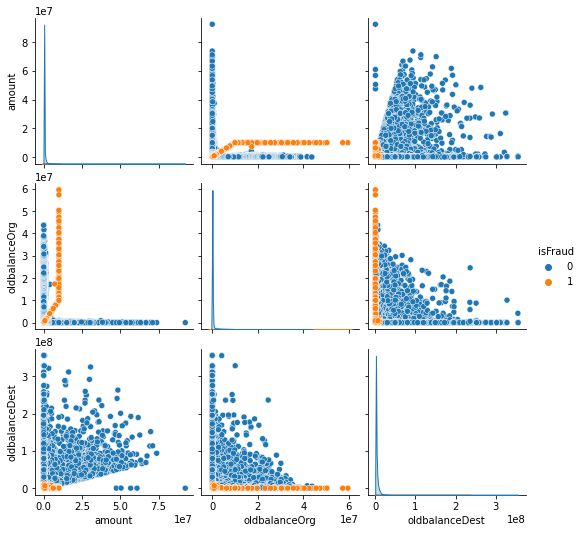

In [62]:
plt.figure(figsize=(12,8))
sns.pairplot(df[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']], hue='isFraud')

<Figure size 864x576 with 0 Axes>

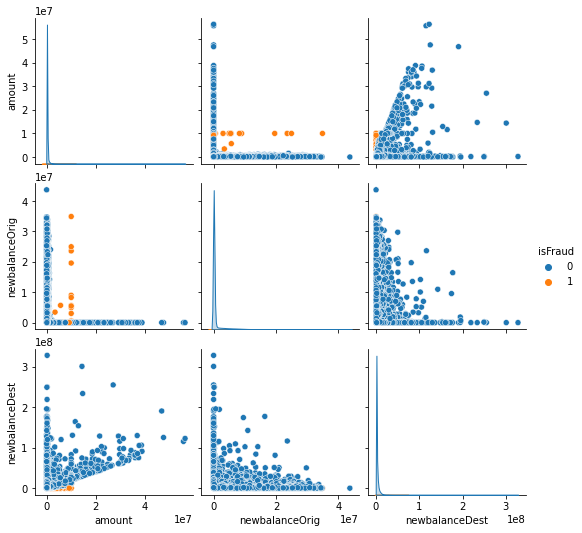

In [85]:
plt.figure(figsize=(12,8))
sns.pairplot(df_sample[['amount', 'newbalanceOrig', 'newbalanceDest', 'isFraud']], hue='isFraud')

<Figure size 864x576 with 0 Axes>

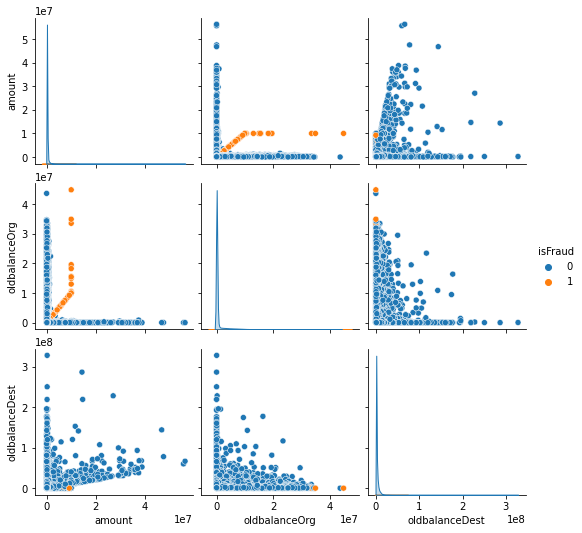

In [86]:
plt.figure(figsize=(12,8))
sns.pairplot(df_sample[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']], hue='isFraud')

# Flagged Fraud

In [66]:
print(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates())) # only 'TRANSFER' for flaggedFraud

dfTransfer = df.loc[df.type == 'TRANSFER'] #df of Transfer
dfFlagged = df.loc[df.isFlaggedFraud == 1] #df of flagged
dfNotFlagged = df.loc[df.isFlaggedFraud == 0] #df of notFlagged

print(dfFlagged.amount.min()) # 353874.22

print(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max()) # 92445516.64

['TRANSFER']
353874.22
92445516.64


In [67]:
dfFlagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [71]:
fraud.loc[(fraud.type == 'TRANSFER') & (fraud.amount > 200000) & (fraud.newbalanceDest > 1)].count()

step              20
type              20
amount            20
nameOrig          20
oldbalanceOrg     20
newbalanceOrig    20
nameDest          20
oldbalanceDest    20
newbalanceDest    20
isFraud           20
isFlaggedFraud    20
dtype: int64

In [74]:
fraud.loc[(fraud.type == 'TRANSFER') & (fraud.amount > 200000) & (fraud.newbalanceDest == 0)].count()

step              2720
type              2720
amount            2720
nameOrig          2720
oldbalanceOrg     2720
newbalanceOrig    2720
nameDest          2720
oldbalanceDest    2720
newbalanceDest    2720
isFraud           2720
isFlaggedFraud    2720
dtype: int64

In [77]:
fraud.loc[(fraud.type == 'CASH_OUT') & (fraud.amount > 200000) & (fraud.newbalanceDest > 1)].count()

step              2729
type              2729
amount            2729
nameOrig          2729
oldbalanceOrg     2729
newbalanceOrig    2729
nameDest          2729
oldbalanceDest    2729
newbalanceDest    2729
isFraud           2729
isFlaggedFraud    2729
dtype: int64

In [75]:
fraud.loc[(fraud.type == 'CASH_OUT') & (fraud.amount > 200000) & (fraud.newbalanceDest == 0)].count()

step              2
type              2
amount            2
nameOrig          2
oldbalanceOrg     2
newbalanceOrig    2
nameDest          2
oldbalanceDest    2
newbalanceDest    2
isFraud           2
isFlaggedFraud    2
dtype: int64

Solo existen 20 operaciones fraudulentas de transferencia que no hayan sido detenidas. Sin embargo, parece existir una problemática cuando se trata de CASH OUT, ya que es probable que no puedan identificar el fraude.

- Flaggedfraud al parecer es irrelevante para el estudio, ya que da una condición que basicamente se cumple en los fraudes comunes. lo que yo entiendo es que son fraudes > 200k que han sido detenidos. Por otro lado, existen fraudes donde no son flagged fraud > 200k y también se detienen
- Por otro lado, solo dos casos de CASH OUT han sido 'parados' 

In [140]:
dfFlagged.shape # Only 16 flagged frauds

(16, 11)

In [133]:
print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: {}'.\
format([round(dfFlagged.oldbalanceOrg.min()), round(dfFlagged.oldbalanceOrg.max())]))

print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where \
oldBalanceOrig = \
newBalanceOrig: {}'.format(\
[dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
== dfTransfer.newbalanceOrig)].oldbalanceOrg.min(), \
round(dfTransfer.loc[(dfTransfer.isFlaggedFraud == 0) & (dfTransfer.oldbalanceOrg \
               == dfTransfer.newbalanceOrig)].oldbalanceOrg.max())]))


Min, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: [353874, 19585040]

Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 575668]


In [128]:
print('\nHave originators of transactions flagged as fraud transacted more than \
once? {}'\
.format((dfFlagged.nameOrig.isin(pd.concat([dfNotFlagged.nameOrig, \
                                    dfNotFlagged.nameDest]))).any())) # False

print('\nHave destinations for transactions flagged as fraud initiated\
 other transactions? \
{}'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any())) # False

# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been
# destination accounts more than once,
# clearly 'isFlaggedFraud' being set is independent of whether a 
# destination account has been used before or not

print('\nHow many destination accounts of transactions flagged as fraud have been \
destination accounts more than once?: {}'\
.format(sum(dfFlagged.nameDest.isin(dfNotFlagged.nameDest)))) # 2


Have originators of transactions flagged as fraud transacted more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 2


**Es irrelevante esta variable para el estudio, ya que sólo han ocurrido 16 veces, frente a los 6M registros, por otro lado, solo existen 2 cuentas donde se haya repetido el fraude cuando es isflaggedfraud**
- Quería hacer un anáisis para entender como se comportaba este tipo de fraude
- A partir del analisis previo, para al análisis de fraude, deberíamos quedarnos solo con las TRANSFERS y el CASH OUT, ya que son las dos utilizadas por los estafadores

In [149]:
df.loc[df.amount == 0].count() # this has to be removed from the DF, because is not relevant 

step              16
type              16
amount            16
nameOrig          16
oldbalanceOrg     16
newbalanceOrig    16
nameDest          16
oldbalanceDest    16
newbalanceDest    16
isFraud           16
isFlaggedFraud    16
dtype: int64

In [ ]:
#tengo que dropear datos

# Analisis exclusivo de Transferencia + Cash Out

In [79]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')] # Me quedo con los datos que me interesan, solo TRANSFERS Y CASH_OUT
#Los unicos tipos de fraude, como hemos visto anteriormente en varias ocasiones


In [84]:
print(X.shape) #Nos quedamos con 1/3 de los datos para hacer un análisis mas enfocado a los tipos de fraudes
X.head()

(2770409, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [127]:
y=X.isFraud    #Creating de x,y variables for the study
del X['isFraud'] # eliminating isFraud of X

In [107]:
dfFraudTransfer[dfFraudTransfer.newbalanceDest >1].count()

step              29
type              29
amount            29
nameOrig          29
oldbalanceOrg     29
newbalanceOrig    29
nameDest          29
oldbalanceDest    29
newbalanceDest    29
isFraud           29
isFlaggedFraud    29
dtype: int64

In [108]:
dfFraudCashOut.loc[dfFraudCashOut.newbalanceDest <1].count()

step              23
type              23
amount            23
nameOrig          23
oldbalanceOrg     23
newbalanceOrig    23
nameDest          23
oldbalanceDest    23
newbalanceDest    23
isFraud           23
isFlaggedFraud    23
dtype: int64

Estudiemos casos fraudulentos. Existe la posibilidad de que haya una transferencia fraudulenta, que a posteriori se canjee por cashout?

In [123]:
(dfFraudTransfer.nameDest.isin(dfFraudCashOut.nameOrig)).any() # No parece tener relación 

False

In [118]:
dfFraudTransfer.loc[dfFraudTransfer.nameDest.isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


conclusion (escribir)

## Drop columns and encoding the type column

In [129]:
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)  
#Sobreescribo el dataframe X eliminando las columnas no necesarias para el analisis


In [130]:
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
#Binary Encoding para Transer + Cash Out 

In [133]:
X.info() # we need to convert dtype of type to int for the encoding
X.type = X.type.astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 169.1+ MB


In [134]:
X.info() # ready

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
dtypes: float64(5), int64(2)
memory usage: 169.1 MB


In [ ]:
Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]